# _World Military Power - Clustering Preject_

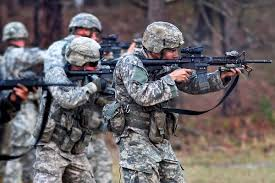

_**Clustering** benzer nesnelerin veya verilerin gruplar halinde toplanması demektir._ <br>
_Bu projede, ülkelerin askeri güç verilerini benzer özelliklerine göre gruplandırmak amacıyla **clustering (kümeleme) analizi** yapılacaktır._

### _İmport Libraries_

In [1]:
import pandas as pd
# Veri analizi ve tablo işlemleri için kullanılır.

import warnings
warnings.filterwarnings('ignore')
# Çalışma sırasında çıkan uyarı mesajlarını gizler.

import matplotlib.pyplot as plt
import seaborn as sns
# Grafik ve görselleştirme işlemleri için kullanılır.

In [2]:
from sklearn.cluster import KMeans
# KMeans algoritmasını kullanarak veri kümelerini (cluster) oluşturmak için kullanılır.

from sklearn.metrics import silhouette_score
# Kümeleme başarısını ölçmek için kullanılan Silhouette (gölge) skorunu hesaplar.

In [3]:
from yellowbrick.cluster import KElbowVisualizer

# KMeans için en uygun küme (cluster) sayısını belirlemeye yardımcı olan görselleştirme aracıdır.

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hiyerarşik kümeleme (hierarchical clustering) için kullanılır.
# 'linkage' kümeler arası mesafeyi hesaplar, 'dendrogram' ise bu yapıyı görselleştirir.

In [5]:
from sklearn.cluster import DBSCAN

# Yoğunluk tabanlı kümeleme (Density-Based Spatial Clustering) algoritmasını kullanmak için.
# Gürültülü (outlier) verilerde etkili bir kümeleme yöntemidir.

In [6]:
import numpy as np
# Sayısal işlemler ve dizi (array) yapıları için kullanılır.

from sklearn.datasets import make_blobs
# Kümeleme örnekleri için yapay (örnek) veri setleri oluşturur.

from scipy.cluster.hierarchy import dendrogram, linkage
# Hiyerarşik kümeleme işlemleri için kullanılır.
# 'linkage' kümeler arası mesafeyi hesaplar, 'dendrogram' küme yapısını görselleştirir.

In [7]:
from sklearn.preprocessing import StandardScaler
# Verileri ölçeklendirmek (standartlaştırmak) için kullanılır.
# Özelliklerin ortalamasını 0, standart sapmasını 1 yapar.

from sklearn.cluster import AgglomerativeClustering
# Hiyerarşik (aşağıdan yukarıya) kümeleme algoritmasını uygulamak için kullanılır.

### _Ingest Data_

In [8]:
df=pd.read_excel('World military power.xlsx', header=[0,1])

# 'World military power.xlsx' adlı Excel dosyasını okur ve veriyi DataFrame olarak 'df' değişkenine yükler.

### _Eda_

In [9]:
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                        1.3444       Afghanistan   
1           Albania                        2.3137           Albania   
2           Algeria                        0.4659           Algeria   
3            Angola                        0.8379            Angola   
4         Argentina                        0.6521         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                     260                  Afghanistan   
1                      19                      Albania   
2                     551                      Algeria   
3                     295                       Angola   
4                     227                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                  0              Afghanistan   
1                                  0                  Albania   
2                                103                  Algeria   
3                                 72                   Angola   
4                                 24                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                             25                       Afghanistan   
1                              0                           Albania   
2                             22                           Algeria   
3                             18                            Angola   
4                              7                         Argentina   

                                           ...         Manpower  \
  Transport Aircraft Fleet Strength value  ... Total Population   
0                                      30  ...      Afghanistan   
1                                       0  ...          Albania   
2                                      59  ...          Algeria   
3                                      30  ...           Angola   
4                                       9  ...        Argentina   

                                      Geography                               \
  Total Population value Total Square Land Area Total Square Land Area value   
0            3,49,40,837            Afghanistan                     6,52,230   
1              30,57,220                Albania                        28748   
2            4,16,57,488                Algeria                    23,81,741   
3            3,03,55,880                 Angola                    12,46,700   
4            4,46,94,198              Argentina                    27,80,400   

                                                           \
  Total Coastline Coverage Total Coastline Coverage value   
0              Afghanistan                              0   
1                  Albania                            362   
2                  Algeria                            998   
3                   Angola                           1600   
4                Argentina                           4989   

                                                                               \
  Total Waterway Coverage Total Waterway Coverage value Total Border Coverage   
0             Afghanistan                          1200           Afghanistan   
1                 Albania                            41               Albania   
2                 Algeria                             0               Algeria   
3                  Angola                          1300                Angola   
4               Argentina                         11000             Argentina   

                               
  Total Border Coverage value  
0                      5987.0  
1                       691.0  


In [10]:
df.shape

(138, 60)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    int64  
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    int64  
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [12]:
# multi-index kolonları birleştirip tek isim haline getir
df.columns = ['_'.join(map(str, i)).strip() for i in df.columns.values]

In [13]:
# sadece ülke, power index ve 'value' ile biten sayısal sütunları seç
df2 = df[['2020 ranking_Military Strength','2020 ranking_Military Strength Power Index'] + [c for c in df.columns if c.endswith('value')]]

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   2020 ranking_Military Strength                             138 non-null    object 
 1   2020 ranking_Military Strength Power Index                 138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    int64  
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    int64  
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    int64  
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    int64  
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    int64  
 8   Airforce S

In [15]:
df2= df2.rename(columns={'2020 ranking_Military Strength': 'Country', '2020 ranking_Military Strength Power Index':'Power Index'})

In [16]:
df2.isnull().sum()

Country                                                       0
Power Index                                                   0
Airforce Strength_Aircraft Strength value                     0
Airforce Strength_Fighter/Interceptor Strength value          0
Airforce Strength_Attack Aircraft Strength value              0
Airforce Strength_Transport Aircraft Fleet Strength value     0
Airforce Strength_Trainer Aircraft Fleet value                0
Airforce Strength_Helicopter Fleet Strength value             0
Airforce Strength_Attack Helicopter Fleet Strength value      0
Land Strength_Tank Strength value                             0
Land Strength_AFV/APC Strength value                          0
Land Strength_Self-Propelled Artillery Strength value         0
Land Strength_Towed Artillery Strength value                  0
Land Strength_Rocket Projector Strength value                 0
Navy Strength_Navy Fleet Strengths value                     14
Navy Strength_Aircraft Carrier Fleet Str

In [17]:
# eksik navy değerlerini 0 ile doldur
df2[[c for c in df2.columns if 'Navy Strength_' in c]] = df2[[c for c in df2.columns if 'Navy Strength_' in c]].fillna(0)

In [18]:
# eksik coğrafi değerleri 0 ile doldur
df2[[c for c in df2.columns if 'Geography_Total' in c]] = df2[[c for c in df2.columns if 'Geography_Total' in c]].fillna(0)

In [19]:
df2.isnull().sum()

Country                                                      0
Power Index                                                  0
Airforce Strength_Aircraft Strength value                    0
Airforce Strength_Fighter/Interceptor Strength value         0
Airforce Strength_Attack Aircraft Strength value             0
Airforce Strength_Transport Aircraft Fleet Strength value    0
Airforce Strength_Trainer Aircraft Fleet value               0
Airforce Strength_Helicopter Fleet Strength value            0
Airforce Strength_Attack Helicopter Fleet Strength value     0
Land Strength_Tank Strength value                            0
Land Strength_AFV/APC Strength value                         0
Land Strength_Self-Propelled Artillery Strength value        0
Land Strength_Towed Artillery Strength value                 0
Land Strength_Rocket Projector Strength value                0
Navy Strength_Navy Fleet Strengths value                     0
Navy Strength_Aircraft Carrier Fleet Strength value    

In [20]:
df2.corr(numeric_only=True)['Power Index'].abs().sort_values(ascending=False)

Power Index                                                  1.000000
Navy Strength_Navy Fleet Strengths value                     0.381789
Land Strength_AFV/APC Strength value                         0.361796
Navy Strength_Frigate Fleet Strength value                   0.359353
Land Strength_Towed Artillery Strength value                 0.335405
Land Strength_Tank Strength value                            0.324300
Airforce Strength_Fighter/Interceptor Strength value         0.310888
Airforce Strength_Trainer Aircraft Fleet value               0.284756
Navy Strength_Submarine Fleet Strength value                 0.274310
Land Strength_Self-Propelled Artillery Strength value        0.268935
Airforce Strength_Aircraft Strength value                    0.267329
Airforce Strength_Transport Aircraft Fleet Strength value    0.267104
Land Strength_Rocket Projector Strength value                0.247800
Geography_Total Border Coverage value                        0.247132
Airforce Strength_He

<Axes: >

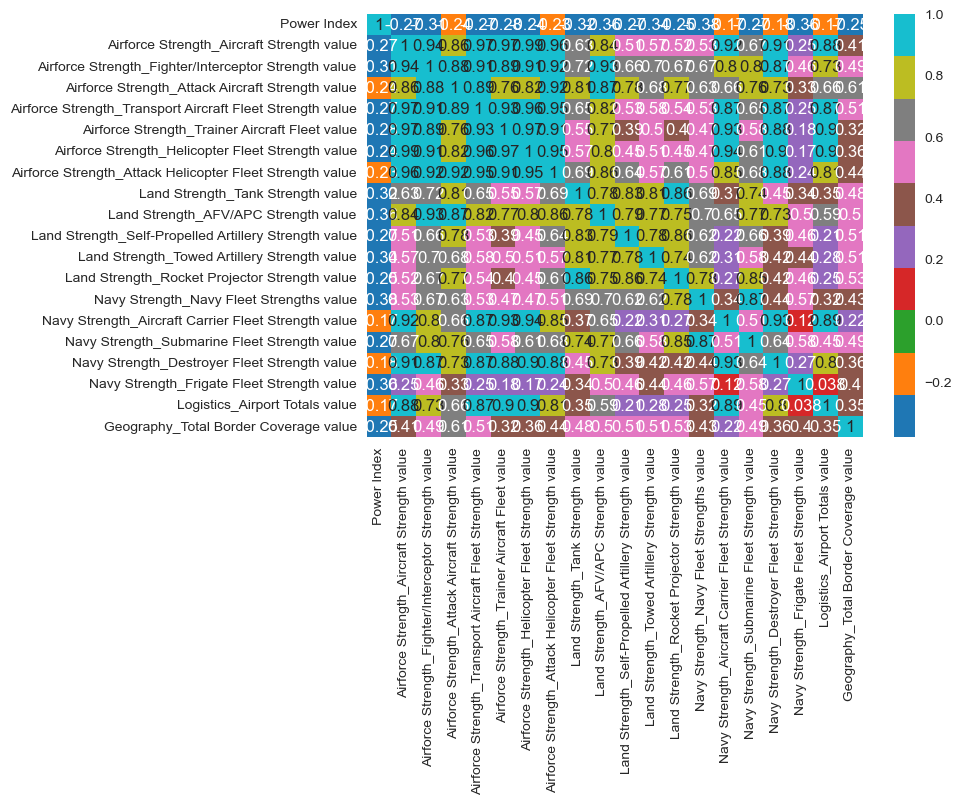

In [21]:
sns.heatmap(df2.corr(numeric_only=True) ,annot=True, cmap='tab10')

In [22]:
# sayısal gibi görünen string kolonlardaki virgül ve boşlukları temizleyip float'a çevir
df2 = df2.replace({',': '', ' ': ''}, regex=True).apply(pd.to_numeric, errors='ignore')

### _K-Means Clustering_

In [23]:
x = df2.drop('Country', axis=1)

In [24]:
model = KMeans(4)
# 4 kümeli bir KMeans modeli oluşturur.

In [25]:
model = model.fit(x)
# Modeli verilerle eğitir (küme merkezlerini hesaplar).

In [26]:
tahmin = model.predict(x)
# Her gözlemin hangi kümeye ait olduğunu tahmin eder.

In [27]:
x['cluster'] = tahmin
# Tahmin edilen küme etiketlerini 'cluster' adlı yeni bir sütun olarak ekler.

In [28]:
x.head()
# İlk 5 satırı görüntüler, kümelenmiş verinin yapısını görmek için kullanılır.

,Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,...,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value,cluster
0,1.3444,260,0,25,30,0,187,0,0,1062,...,0,5500,0,14325743,34940837,652230,0,1200,5987.0,0
1,2.3137,19,0,0,0,0,19,0,0,467,...,16000,42500,168300000,1519438,3057220,28748,362,41,691.0,0
2,0.4659,551,103,22,59,87,257,45,880,7361,...,1306000,325000,12200000000,20741263,41657488,2381741,998,0,6734.0,0
3,0.8379,295,72,18,30,47,126,15,379,595,...,1666000,82300,8273000000,6244205,30355880,1246700,1600,1300,5369.0,0
4,0.6521,227,24,7,9,64,100,0,370,739,...,479400,685000,2185000000,20179430,44694198,2780400,4989,11000,11968.0,0


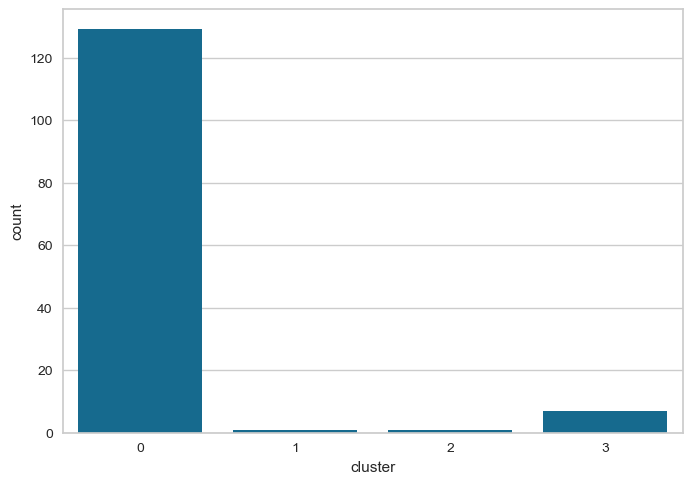

In [29]:
sns.countplot(x=x['cluster']);
# Her kümede kaç örnek (veri noktası) olduğunu çubuk grafikte gösterir.

In [30]:
silhouette_score(x, tahmin)
# Kümeleme kalitesini ölçen Silhouette skorunu hesaplar.
# Skor 1’e yaklaştıkça kümeler daha belirgin ve başarılıdır.

np.float64(0.8712747653404063)

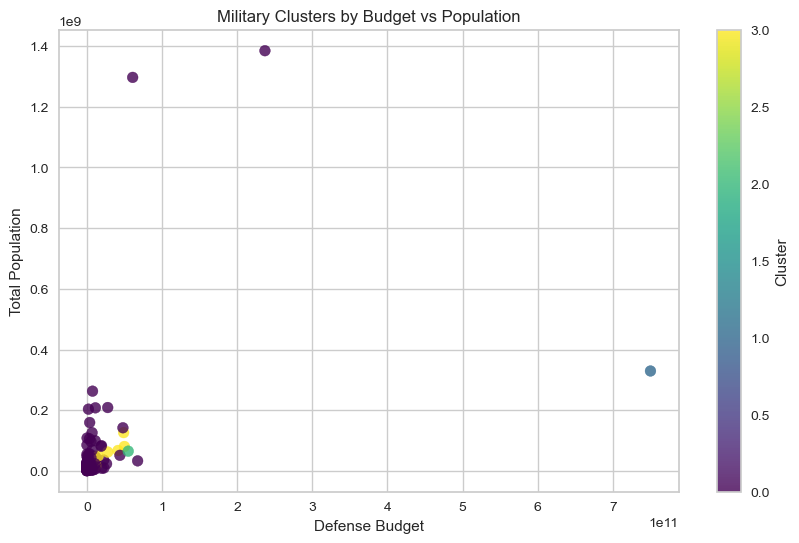

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(
    x['Finances_defense spending budget value'],
    x['Manpower_Total Population value'],
    c=tahmin, cmap='viridis', s=60, alpha=0.8
)
plt.title('Military Clusters by Budget vs Population')
plt.xlabel('Defense Budget')
plt.ylabel('Total Population')
plt.colorbar(label='Cluster')
plt.show()


In [32]:
# wcss = within cluster sum of squares (küme içi kareler toplamı)
wcss = []  # Her küme sayısı için WCSS değerlerini saklayacak liste
ss = []    # Her küme sayısı için Silhouette skorlarını saklayacak liste

for i in range(2, 10):
    model = KMeans(i)
    # i sayıda küme olacak şekilde KMeans modelini oluşturur.

    model = model.fit(x)
    # Modeli verilerle eğitir (küme merkezlerini hesaplar).

    tahmin = model.predict(x)
    # Her gözlemin hangi kümeye ait olduğunu tahmin eder.

    ssl = silhouette_score(x, tahmin)
    # Kümeleme kalitesini ölçen Silhouette skorunu hesaplar.

    ss.append(ssl)
    # Hesaplanan Silhouette skorunu listeye ekler.

    print(ssl)
    # Her iterasyonda Silhouette skorunu ekrana yazdırır.

    wcss.append(model.inertia_)
    # KMeans modelinin küme içi hata kareleri toplamını (inertia_) listeye ekler.

0.9493996936226436
0.8995442950361631
0.8712747653404063
0.8585333966736376
0.840946779258456
0.7786850050674872
0.7766982061360016
0.6818555400770482


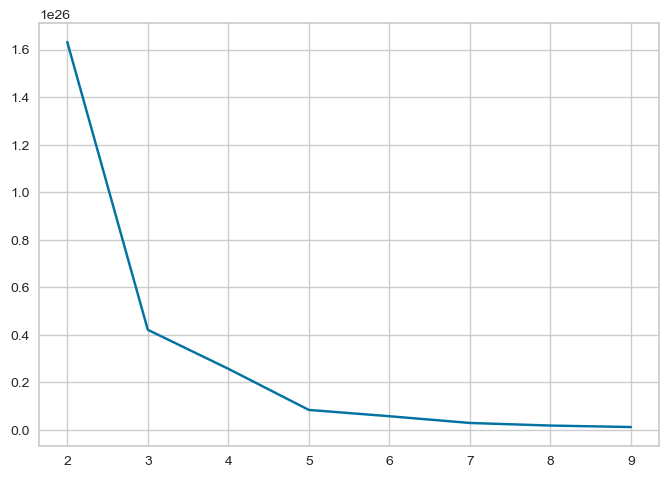

In [33]:
plt.plot(range(2,10), wcss);
# 2'den 9'a kadar olan küme sayıları için WCSS değerlerini çizer.
# Grafikteki “dirsek” (elbow) noktasının kırıldığı yer,
# en uygun küme sayısını (optimum cluster sayısı) gösterir.

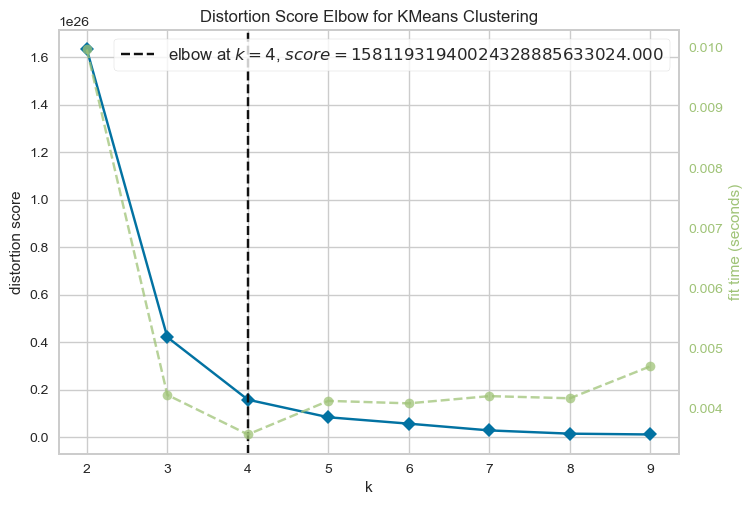

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
vis = KElbowVisualizer(KMeans(), k=(2,10))
# 2 ile 10 arasındaki küme sayıları için KMeans modelini değerlendirir.
# En uygun küme sayısını (elbow noktasını) otomatik olarak bulmak için görselleştirici oluşturur.

vis.fit(x)
# Veriyi modele uygular ve her küme sayısı için WCSS değerlerini hesaplar.

vis.show()
# Elbow (dirsek) grafiğini ekranda gösterir.

In [35]:
merged_df = x.merge(df2[['Country']], left_index=True, right_index=True)
merged_df.head()

,Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,...,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value,cluster,Country
0,1.3444,260,0,25,30,0,187,0,0,1062,...,5500,0,14325743,34940837,652230,0,1200,5987.0,0,Afghanistan
1,2.3137,19,0,0,0,0,19,0,0,467,...,42500,168300000,1519438,3057220,28748,362,41,691.0,0,Albania
2,0.4659,551,103,22,59,87,257,45,880,7361,...,325000,12200000000,20741263,41657488,2381741,998,0,6734.0,0,Algeria
3,0.8379,295,72,18,30,47,126,15,379,595,...,82300,8273000000,6244205,30355880,1246700,1600,1300,5369.0,0,Angola
4,0.6521,227,24,7,9,64,100,0,370,739,...,685000,2185000000,20179430,44694198,2780400,4989,11000,11968.0,0,Argentina


In [36]:
merged_df[merged_df.cluster==3]['Country']

40          France
43         Germany
53         Ireland
55           Italy
57           Japan
82     Netherlands
112          Spain
Name: Country, dtype: object

In [37]:
merged_df[merged_df.cluster==2]['Country']

129    UnitedKingdom
Name: Country, dtype: object

In [38]:
merged_df[merged_df.cluster==1]['Country']

130    UnitedStates
Name: Country, dtype: object

In [39]:
merged_df[merged_df.cluster==0]['Country']

0      Afghanistan
1          Albania
2          Algeria
3           Angola
4        Argentina
          ...     
133      Venezuela
134        Vietnam
135          Yemen
136         Zambia
137       Zimbabwe
Name: Country, Length: 129, dtype: object

### _Hierarchical Clustering_

In [40]:
data = linkage(x, method='ward', metric='euclidean')

# Hiyerarşik kümeleme için bağlantı (linkage) matrisi oluşturur.
# 'ward' yöntemi, kümeler arası varyansı minimize ederek birleştirme yapar.
# 'euclidean' ise öklid (doğrusal) uzaklık ölçüsünü kullanır.

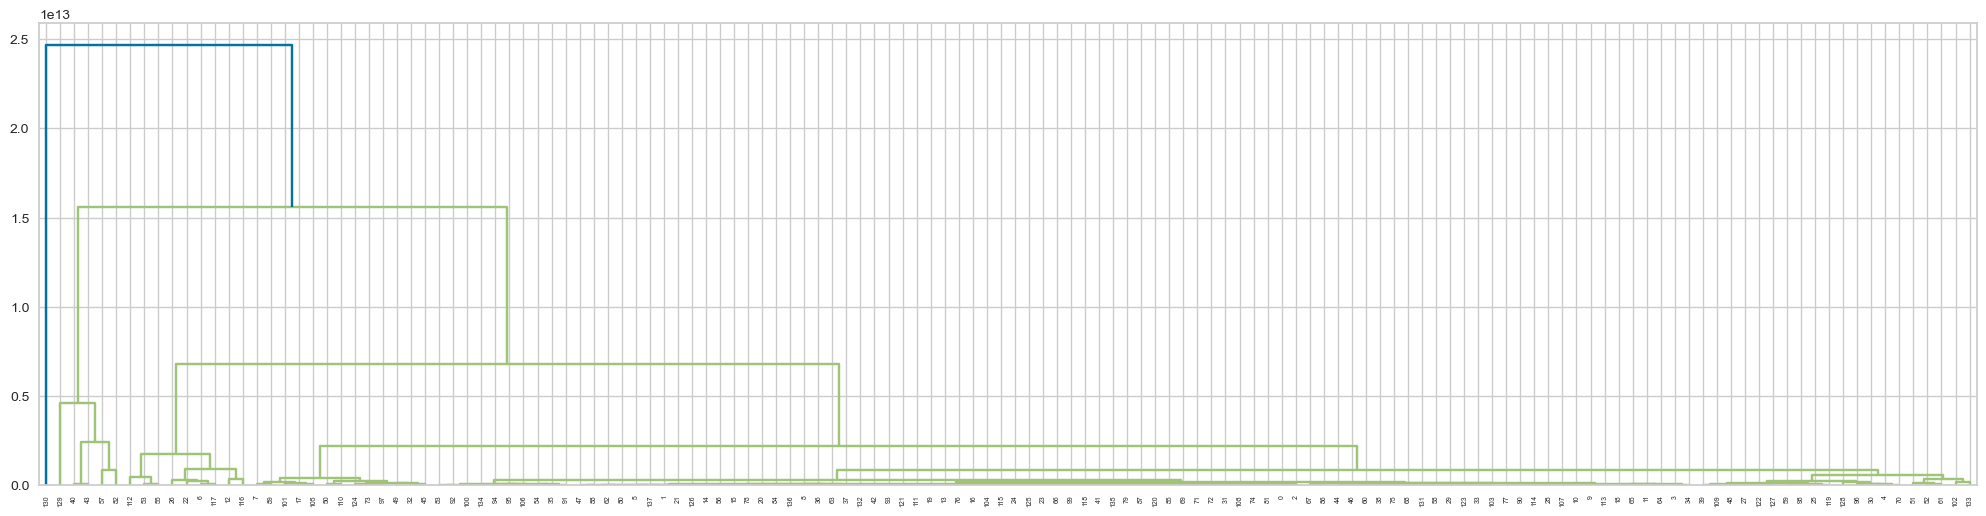

In [41]:
plt.figure(figsize=(25,6))
# Grafiğin boyutunu geniş (25x6 inç) olarak ayarlar, dalları rahat görmek için.

dendrogram(data);
# Hiyerarşik kümeleme sonucunu ağaç yapısında (dendrogram) görselleştirir.
# Dalların birleştiği yükseklikler kümeler arası mesafeyi gösterir.

### _DBSCAN Clustering_

In [42]:
#Finances_defense spending budget value → ülkenin savunma bütçesi
#Manpower_Total Population value → ülkenin toplam nüfusu

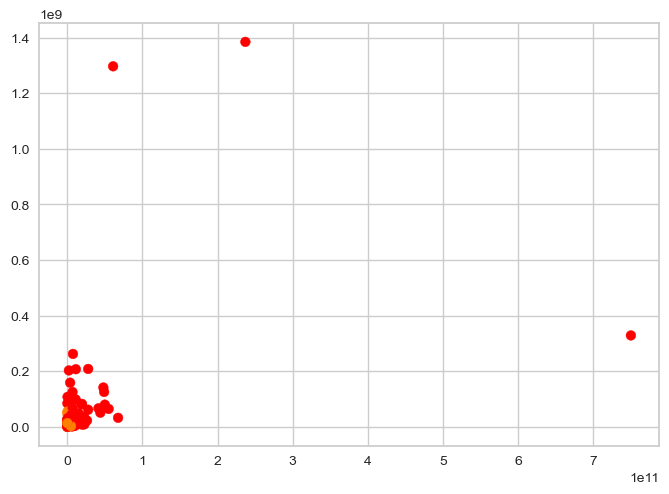

In [43]:
db = DBSCAN(min_samples=5)
# DBSCAN (yoğunluk tabanlı kümeleme) modelini oluşturur.
# min_samples=5: Bir küme oluşması için en az 5 nokta gereklidir.

x2 = StandardScaler().fit_transform(x)
# Veriyi ölçeklendirir (ortalama=0, standart sapma=1) — DBSCAN uzaklığa duyarlı olduğu için önemlidir.

y = db.fit_predict(x2)
# DBSCAN modelini uygular ve her örneğe ait küme etiketini tahmin eder.
# Gürültü (outlier) noktaları genellikle -1 etiketiyle gösterilir.

plt.scatter(x['Finances_defense spending budget value'], x['Manpower_Total Population value'], c=y, cmap='autumn');
# Finances_defense spending budget value ve Manpower_Total Population value değerlerine göre noktaları çizer.
# 'c=y' kümelere göre renklendirir, 'autumn' renk haritası kullanılır.

plt.savefig('clustering.png', dpi=300)
# Grafiği 'clustering.png' adıyla kaydeder, 300 dpi çözünürlükte.

### _Agglomerative Clustering_

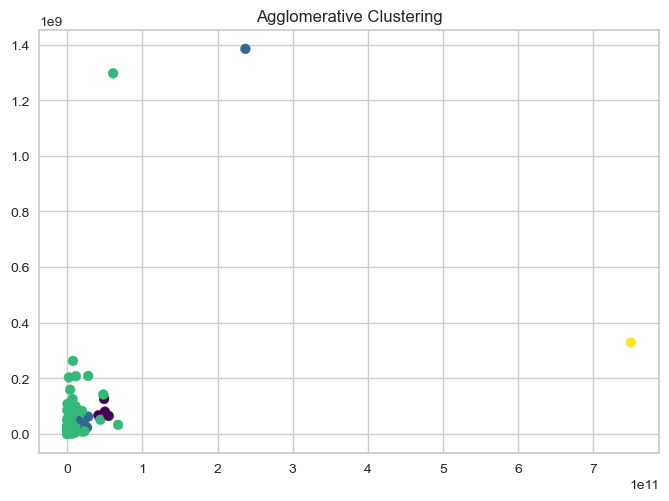

In [44]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
# 4 kümeli hiyerarşik (aşağıdan yukarıya) kümeleme modeli oluşturur.

y_agg = agg_clustering.fit_predict(x)
# Veriyi modele uygular ve her gözlemin hangi kümeye ait olduğunu tahmin eder.

# Sonuçları görselleştirme
plt.scatter(x['Finances_defense spending budget value'], x['Manpower_Total Population value'], c=y_agg, s=50, cmap='viridis')
# Finances_defense spending budget value ve Manpower_Total Population value değerlerine göre noktaları çizer.
# 'c=y_agg' kümelere göre renklendirme yapar.
# 's=50' nokta boyutunu, 'cmap="viridis"' renk paletini belirler.

plt.title("Agglomerative Clustering")
# Grafiğe başlık ekler.

plt.show()
# Grafiği ekranda gösterir.

_Bu projede **clustering algoritmaları (farklı kümeleme)** kullanılarak ülkeler askeri güç göstergelerine göre benzerliklerine dayanarak gruplandırılmıştır._

_Kümeleme sonucunda elde edilen **silhouette_score = 0.8671436271439987** olarak bulunmuştur._